In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sn

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/datasets/diabetes_data_upload.csv')
print('import done')

import done


In [ ]:
dataset.shape

(520, 17)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

## Splitting dataset by dependencies

In [ ]:
X = dataset.drop(['class'],axis=1)
Y = dataset['class']

## Finding missing value

In [ ]:
dataset_missing = X.isna()
dataset_missing.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset_missing.dtypes

Age                   bool
Gender                bool
Polyuria              bool
Polydipsia            bool
sudden weight loss    bool
weakness              bool
Polyphagia            bool
Genital thrush        bool
visual blurring       bool
Itching               bool
Irritability          bool
delayed healing       bool
partial paresis       bool
muscle stiffness      bool
Alopecia              bool
Obesity               bool
dtype: object

In [ ]:
dataset_num_missing = dataset_missing.sum()
dataset_num_missing

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
dtype: int64

In [ ]:
dataset_num_missing / len(dataset)

Age                   0.0
Gender                0.0
Polyuria              0.0
Polydipsia            0.0
sudden weight loss    0.0
weakness              0.0
Polyphagia            0.0
Genital thrush        0.0
visual blurring       0.0
Itching               0.0
Irritability          0.0
delayed healing       0.0
partial paresis       0.0
muscle stiffness      0.0
Alopecia              0.0
Obesity               0.0
dtype: float64

## Impute missing value By KNN

In [ ]:
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors = 5)

In [ ]:
num = [col for col in X.columns if dataset[col].dtypes != 'O']

In [ ]:
X[num].head()

,Age
0,40
1,58
2,41
3,45
4,60


In [ ]:
knnimp.fit(X[num])

KNNImputer()

In [ ]:
X[num]  = knnimp.transform(X[num])

In [ ]:
X.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
dtype: int64

## Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(Y)

LabelEncoder()

In [ ]:
le.classes_

array(['Negative', 'Positive'], dtype=object)

In [ ]:
Y = le.transform(Y)

In [ ]:
obj = [col for col in X.columns if dataset[col].dtypes == 'O']
X[obj]

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes
1,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
3,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
4,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No
516,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No
517,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes
518,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No


In [ ]:
for i in obj:
  le.fit(X[i])
  X[i] = le.transform(X[i])

In [ ]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

## Feature transformation or Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[-0.6613669 ,  0.76509206, -0.99233705, ...,  1.29099445,
         1.38022749,  2.21564684],
       [ 0.82136224,  0.76509206, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.57899306,  0.76509206,  1.00772212, ...,  1.29099445,
         1.38022749, -0.45133547],
       ...,
       [ 0.82136224, -1.30703226,  1.00772212, ...,  1.29099445,
        -0.72451824,  2.21564684],
       [-1.32035762, -1.30703226, -0.99233705, ..., -0.77459667,
         1.38022749, -0.45133547],
       [-0.49661921,  0.76509206, -0.99233705, ..., -0.77459667,
        -0.72451824, -0.45133547]])

## Handling Imbalanced Dataset

Text(0, 0.5, 'No of patients')

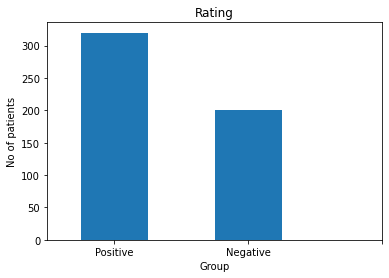

In [ ]:
count_classes = pd.value_counts(dataset['class'])
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Rating")
plt.xticks(range(3))
plt.xlabel("Group")
plt.ylabel("No of patients")

In [ ]:
nondemented = Y[Y== 1]
demented = Y[Y== 0]

In [ ]:
print(nondemented.shape, demented.shape)

(320,) (200,)


## SMOTE Sampling

In [ ]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 10)

In [ ]:
X,Y = smk.fit_resample(X,Y)

In [ ]:
X.shape,Y.shape

((638, 16), (638,))

## Feature Correlation and Dimension Reduction(LDA)

In [ ]:
from sklearn.preprocessing import Normalizer
X = Normalizer().fit_transform(X)
X = pd.DataFrame(X)

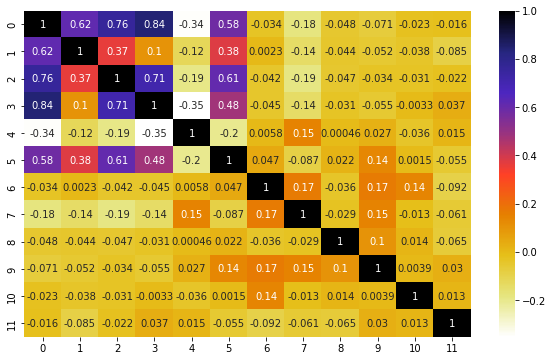

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components =-1 )
X = lda.fit_transform(X,Y)

## Splitting dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Import libraries and Function

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
import seaborn as sns

In [ ]:
def cvresult(y,pred):
  print('Cross Val f1 score : ',f1_score(y,pred))
  print('Cross Val Precision : ',precision_score(y,pred))
  print('Cross Val recall : ',recall_score(y,pred))
  print('Cross Val Classification Report : \n',classification_report(y,pred))

In [ ]:
def result(y,p):
  print('Accuracy : ',accuracy_score(y,p))
  print('f1 score : ',f1_score(y,p))
  print('Precision : ',precision_score(y,p))
  print('recall : ',recall_score(y,p))
  print('Classification Report : \n',classification_report(y,p))

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

## K-Fold Validation Import

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def Kfold_result(X,Y,model,foldnum):
   print("\ncross validation")
   from sklearn.model_selection import cross_val_score, cross_validate,cross_val_predict
   from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
   scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}

   results = cross_validate(estimator=model,
                                          X=X,
                                          y=Y,
                                          cv=10,
                                          scoring=scoring)
   print('cross accuracy:',np.mean(results['test_accuracy']))
   print('cross precision:',np.mean(results['test_precision']))
   print('cross recall:',np.mean(results['test_recall']))
   print('cross f1 score:', np.mean(results['test_f1_score']))
   cross_pred_test = cross_val_predict(model,X,Y,cv = 10)
   cm = confusion_matrix(Y,cross_pred_test)
   group_names = ['','','','']
   group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
   group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
   labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
   labels = np.asarray(labels).reshape(2,2)
   sns.heatmap(cm, annot=labels, fmt='', cmap='Purples')

   pass

## Import Classifier Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier

# Hyper Parameter Tuning

###  Random search Grid search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### Linear Regression Random Search

In [ ]:
rs = RandomizedSearchCV(LogisticRegression(solver='liblinear',multi_class='auto'),{ 'C' : [1,5,10]}, cv = 10,return_train_score=False, n_iter=2)
rs.fit(X,Y)
best_paramlr = rs.best_params_
pd.DataFrame(rs.cv_results_)[['param_C','mean_test_score']]
print(best_paramlr)

{'C': 1}


###KNN Random Search

In [ ]:
rs = RandomizedSearchCV(KNeighborsClassifier(), {
            'leaf_size' : [1,5,10,15,20,50],
            'n_neighbors' : [1,5,10,15],
            'p' : [1,2,3]
        })
rs.fit(X,Y)
best_paramknn = rs.best_params_
pd.DataFrame(rs.cv_results_)[['param_leaf_size','param_n_neighbors','param_p','mean_test_score']]
print(best_paramknn)

{'p': 2, 'n_neighbors': 1, 'leaf_size': 10}


### SVM Random Search

In [ ]:
srs = RandomizedSearchCV(SVC(gamma='auto'),
            {
            'C' : [1,5,10,20,50],
            'kernel': ['rbf','linear']
        })
srs.fit(X,Y)
best_params = srs.best_params_
pd.DataFrame(srs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.971826
1,1,linear,0.943615
2,5,rbf,0.982788
3,5,linear,0.934240
4,10,rbf,0.981225
5,10,linear,0.942052
6,20,rbf,0.979663
7,20,linear,0.942052
8,50,rbf,0.979663
9,50,linear,0.940490


### Naive Bayes Random Search

In [ ]:
nbrs = RandomizedSearchCV(GaussianNB(),
            {
            'var_smoothing' : [0.01,0.02,0.026,0.0265,0.0258,0.03]
        })
nbrs.fit(X,Y)
best_paramnb = nbrs.best_params_
pd.DataFrame(nbrs.cv_results_)[['param_var_smoothing','mean_test_score']]
print(best_paramnb)

{'var_smoothing': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


### Decision tree Random Search

In [ ]:
dtrs = RandomizedSearchCV(DecisionTreeClassifier(),{
            'splitter':['best','random'],
            'max_depth' : [1,3,5],
            'min_samples_leaf':[1,2,3,4,5],
            'max_features':['auto','log2','sqrt',None],
            'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]
        })
dtrs.fit(X,Y)
best_paramdt = dtrs.best_params_
pd.DataFrame(dtrs.cv_results_)[['param_splitter','param_max_depth','param_min_samples_leaf','param_max_features','param_max_leaf_nodes','mean_test_score']]

,param_splitter,param_max_depth,param_min_samples_leaf,param_max_features,param_max_leaf_nodes,mean_test_score
0,random,1,4,auto,40,0.749459
1,random,5,5,None,40,0.932689
2,random,1,5,log2,70,0.783588
3,random,1,3,None,80,0.835458
4,best,5,2,log2,40,0.901341
5,random,1,4,None,20,0.849631
6,best,1,5,sqrt,30,0.780549
7,random,5,1,log2,90,0.907665
8,random,1,3,log2,50,0.748056
9,random,3,4,auto,50,0.833871


### Random Forest Random Search

In [ ]:
rfrs = RandomizedSearchCV(RandomForestClassifier(),{
            'bootstrap': [True],
            'max_depth': [5, 10, None],
            'max_features': ['auto', 'log2'],
            'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
        })
rfrs.fit(X,Y)
best_paramrf = rfrs.best_params_
pd.DataFrame(rfrs.cv_results_)[['param_bootstrap','param_max_depth','param_max_features','param_n_estimators','mean_test_score']]

,param_bootstrap,param_max_depth,param_max_features,param_n_estimators,mean_test_score
0,True,None,auto,15,0.982800
1,True,10,auto,7,0.982800
2,True,5,log2,12,0.960876
3,True,None,auto,8,0.981238
4,True,5,log2,13,0.949889
5,True,5,log2,11,0.954589
6,True,10,auto,13,0.990625
7,True,None,auto,6,0.981238
8,True,None,auto,5,0.984338
9,True,None,auto,11,0.982800


### Extra Tree Random Search

In [ ]:
etrs = RandomizedSearchCV(ExtraTreeClassifier(),{
            'criterion': ['gini','entropy'],
            'max_depth': [i for i in range(1,7,1)],
            'max_features': ['auto', 'log2','sqrt']
        })
etrs.fit(X,Y)
best_paramet = etrs.best_params_
pd.DataFrame(etrs.cv_results_)[['param_criterion','param_max_depth','param_max_features',
                              'mean_test_score']]

,param_criterion,param_max_depth,param_max_features,mean_test_score
0,gini,5,sqrt,0.924828
1,gini,3,auto,0.840182
2,gini,5,auto,0.892028
3,gini,1,auto,0.796112
4,entropy,3,auto,0.838620
5,gini,3,sqrt,0.876304
6,gini,2,auto,0.814985
7,entropy,1,sqrt,0.736750
8,gini,2,log2,0.796260
9,gini,5,log2,0.926464


# Find best parameters

In [ ]:
model_params = {
    'logistic_regression' :{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C' : [1,5,10,20,50]
        }
    },
    'KNN' :{
        'model': KNeighborsClassifier(),
        'params': {
            'leaf_size' : [1,5,10,15,20,50],
            'n_neighbors' : [1,5,10,15],
            'p' : [1,2,3]
        }
    },
    'SVM' :{
        'model': SVC(gamma='auto'),
        'params': {
            'C' : [1,5,10,20,50],
            'kernel': ['rbf','linear']
        }
    },
    'Naive Bayes' :{
        'model': GaussianNB(),
        'params': {
            'var_smoothing' : [0.01,0.02,0.026,0.0265,0.0258,0.03]
        }
    },
    'Decision Tree' :{
        'model': DecisionTreeClassifier(),
        'params': {
            'splitter':['best','random'],
            'max_depth' : [1,3,5],
            'min_samples_leaf':[1,2,3,4,5],
            'max_features':['auto','log2','sqrt',None],
            'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]
        }
    },
    'Random Forest' :{
        'model': RandomForestClassifier(),
        'params': {
            'bootstrap': [True],
            'max_depth': [5, 10, None],
            'max_features': ['auto', 'log2'],
            'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
        }
    }
}

In [ ]:
scores = []
for model_name,mp in model_params.items():
  clf= GridSearchCV(mp['model'],mp['params'],cv=10, return_train_score=False)
  clf.fit(X_train,Y_train)
  scores.append({
      'model' : model_name,
      'best_score' : clf.best_score_,
      'best_params' : clf.best_params_

  })

In [ ]:
df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,logistic_regression,0.845161,{'C': 1}
1,KNN,0.867742,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 3}"
2,SVM,0.900000,"{'C': 50, 'kernel': 'rbf'}"
3,Naive Bayes,0.835484,{'var_smoothing': 0.01}
4,Decision Tree,0.861290,"{'max_depth': 5, 'max_features': 'sqrt', 'max_..."
5,Random Forest,0.903226,"{'bootstrap': True, 'max_depth': None, 'max_fe..."


# Traditional Algorithm

##Logistic Regression

In [ ]:
classifier = LogisticRegression(random_state=42,C=best_paramlr['C'])
classifier.fit(X, Y)

LogisticRegression(C=1, random_state=42)

In [ ]:
r_prob = [0 for _ in range(len(Y_test))]

In [ ]:
Y_predlr = classifier.predict(X_test)

In [ ]:
ytest_pred = classifier.predict_proba(X_test)
lr_prob = classifier.predict_proba(X_test)

In [ ]:
Y_cvpredlr = cross_val_predict(classifier, X, Y, cv=10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predlr)
print(cm)

[[76  8]
 [ 3 73]]


In [ ]:
cm = confusion_matrix(Y,Y_cvpredlr)
print(cm)

[[301  18]
 [ 22 297]]


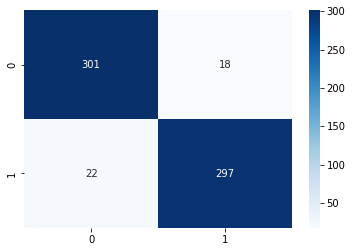

In [ ]:
labels = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(classifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.890625   0.9375     0.859375   0.9375     0.953125   0.984375
 0.953125   0.96875    0.92063492 0.96825397]

Cross Val Accuracy : 0.937326388888889


In [ ]:
cvresult(Y,Y_cvpredlr)

Cross Val f1 score :  0.9369085173501577
Cross Val Precision :  0.9428571428571428
Cross Val recall :  0.9310344827586207
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       319
           1       0.94      0.93      0.94       319

    accuracy                           0.94       638
   macro avg       0.94      0.94      0.94       638
weighted avg       0.94      0.94      0.94       638



In [ ]:
result(Y_test,Y_predlr)

Accuracy :  0.93125
f1 score :  0.9299363057324841
Precision :  0.9012345679012346
recall :  0.9605263157894737
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        84
           1       0.90      0.96      0.93        76

    accuracy                           0.93       160
   macro avg       0.93      0.93      0.93       160
weighted avg       0.93      0.93      0.93       160



In [ ]:
lr_auc = roc_auc_score(Y_test,lr_prob[:,1])
print('roc-auc score :{}'.format(lr_auc))

roc-auc score :0.9829260651629073


##K-NN

In [ ]:
import math
math.sqrt(len(Y_test))

12.649110640673518

In [ ]:
kclassifier = KNeighborsClassifier(n_neighbors = 5,
                                   p=best_paramknn['p'],leaf_size=best_paramknn['leaf_size'])
kclassifier.fit(X,Y)

KNeighborsClassifier(leaf_size=50, p=1)

In [ ]:
Y_predk = kclassifier.predict(X_test)

In [ ]:
Y_cvpredk = cross_val_predict(kclassifier, X, Y, cv=10)

In [ ]:
ytest_pred = kclassifier.predict_proba(X_test)
knn_prob = kclassifier.predict_proba(X_test)

In [ ]:
cmk = confusion_matrix(Y_test,Y_predk)
print(cmk)

[[83  0]
 [ 4 73]]


In [ ]:
cmk = confusion_matrix(Y,Y_cvpredk)
print(cmk)

[[315   5]
 [ 36 284]]


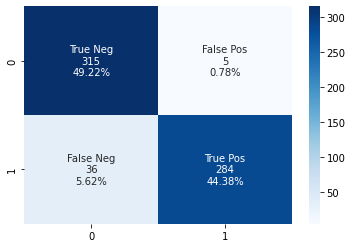

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmk.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmk.flatten()/np.sum(cmk)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmk, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(kclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.875    0.984375 0.890625 0.90625  0.859375 0.953125 0.96875  1.
 0.921875 1.      ]

Cross Val Accuracy : 0.9359375


In [ ]:
cvresult(Y,Y_cvpredk)

Cross Val f1 score :  0.9326765188834153
Cross Val Precision :  0.9826989619377162
Cross Val recall :  0.8875
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       320
           1       0.98      0.89      0.93       320

    accuracy                           0.94       640
   macro avg       0.94      0.94      0.94       640
weighted avg       0.94      0.94      0.94       640



In [ ]:
result(Y_test,Y_predk)

Accuracy :  0.975
f1 score :  0.9733333333333333
Precision :  1.0
recall :  0.948051948051948
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        83
           1       1.00      0.95      0.97        77

    accuracy                           0.97       160
   macro avg       0.98      0.97      0.97       160
weighted avg       0.98      0.97      0.97       160



In [ ]:
knn_auc = roc_auc_score(Y_test,knn_prob[:,1])
print('roc-auc score :{}'.format(knn_auc))

roc-auc score :1.0


##SVM

In [ ]:
sclassifier = SVC(kernel = best_params['kernel'],random_state = 42,C=best_params['C'], probability=True)
sclassifier.fit(X,Y)

SVC(C=5, probability=True, random_state=42)

In [ ]:
Y_preds = sclassifier.predict(X_test)

In [ ]:
ytest_pred = sclassifier.predict_proba(X_test)
svm_prob = sclassifier.predict_proba(X_test)

In [ ]:
Y_cvpreds = cross_val_predict(sclassifier, X, Y, cv=10)

In [ ]:
cms = confusion_matrix(Y_test,Y_preds)
print(cms)

[[82  2]
 [ 0 76]]


In [ ]:
cms = confusion_matrix(Y,Y_cvpreds)
print(cms)

[[313   6]
 [  5 314]]


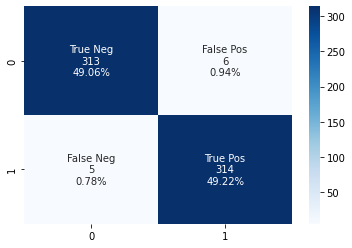

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cms.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cms.flatten()/np.sum(cms)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cms, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(sclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.96875    1.         0.9375     0.984375   1.         0.984375
 0.984375   1.         0.98412698 0.98412698]

Cross Val Accuracy : 0.9827628968253969


In [ ]:
cvresult(Y,Y_cvpreds)

Cross Val f1 score :  0.9827856025039124
Cross Val Precision :  0.98125
Cross Val recall :  0.9843260188087775
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       319
           1       0.98      0.98      0.98       319

    accuracy                           0.98       638
   macro avg       0.98      0.98      0.98       638
weighted avg       0.98      0.98      0.98       638



In [ ]:
result(Y_test,Y_preds)

Accuracy :  0.9875
f1 score :  0.9870129870129869
Precision :  0.9743589743589743
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        84
           1       0.97      1.00      0.99        76

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



In [ ]:
svm_auc = roc_auc_score(Y_test,svm_prob[:,1])
print('roc-auc score :{}'.format(svm_auc))

roc-auc score :1.0


##kernel SVM

In [ ]:
ksclassifier = SVC(kernel = 'linear',C=1,random_state = 0, probability=True)
ksclassifier.fit(X,Y)

SVC(C=1, kernel='linear', probability=True, random_state=0)

In [ ]:
Y_predks = ksclassifier.predict(X_test)

In [ ]:
 ytest_pred = ksclassifier.predict_proba(X_test)
 ksvm_prob = ksclassifier.predict_proba(X_test)

In [ ]:
Y_cvpredks = cross_val_predict(ksclassifier, X, Y, cv=10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predks)
print(cm)

[[45  8]
 [ 3 48]]


In [ ]:
cmks = confusion_matrix(Y,Y_cvpredks)
print(cmks)

[[158  49]
 [ 18 189]]


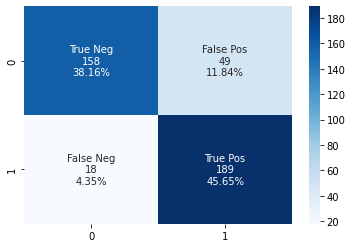

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmks.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmks.flatten()/np.sum(cmks)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmks, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(ksclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.5952381  0.5952381  0.61904762 0.9047619  0.95121951 0.95121951
 0.92682927 1.         0.90243902 0.95121951]

Cross Val Accuracy : 0.8397212543554007


In [ ]:
cvresult(Y,Y_cvpredks)

Cross Val f1 score :  0.8494382022471909
Cross Val Precision :  0.7941176470588235
Cross Val recall :  0.9130434782608695
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.76      0.83       207
           1       0.79      0.91      0.85       207

    accuracy                           0.84       414
   macro avg       0.85      0.84      0.84       414
weighted avg       0.85      0.84      0.84       414



In [ ]:
result(Y_test,Y_predks)

Accuracy :  0.8942307692307693
f1 score :  0.897196261682243
Precision :  0.8571428571428571
recall :  0.9411764705882353
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        53
           1       0.86      0.94      0.90        51

    accuracy                           0.89       104
   macro avg       0.90      0.90      0.89       104
weighted avg       0.90      0.89      0.89       104



In [ ]:
ksvm_auc = roc_auc_score(Y_test,ksvm_prob[:,1])
print('roc-auc score :{}'.format(ksvm_auc))

roc-auc score :0.9500554938956715


## Naive Bays

In [ ]:
nbclassifier = GaussianNB(var_smoothing=best_paramnb['var_smoothing'])
nbclassifier.fit(X,Y)

GaussianNB(var_smoothing=0.01)

In [ ]:
Y_prednb = nbclassifier.predict(X_test)

In [ ]:
ytest_pred = nbclassifier.predict_proba(X_test)
nb_prob = nbclassifier.predict_proba(X_test)

In [ ]:
Y_cvprednb = cross_val_predict(nbclassifier,X,Y,cv = 10)

In [ ]:
cms = confusion_matrix(Y_test,Y_prednb)
print(cms)

[[73 11]
 [ 5 71]]


In [ ]:
cvcms = confusion_matrix(Y, Y_cvprednb)
print(cvcms)

[[269  50]
 [ 24 295]]


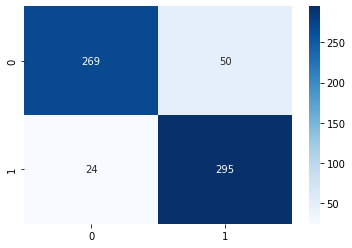

In [ ]:
labels = ["{0:0.0f}".format(value) for value in
                cvcms.flatten()]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cvcms, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(nbclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.859375   0.90625    0.8125     0.921875   0.828125   0.875
 0.9375     0.90625    0.88888889 0.9047619 ]

Cross Val Accuracy : 0.8840525793650794


In [ ]:
cvresult(Y,Y_cvprednb)

Cross Val f1 score :  0.8885542168674699
Cross Val Precision :  0.855072463768116
Cross Val recall :  0.9247648902821317
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       319
           1       0.86      0.92      0.89       319

    accuracy                           0.88       638
   macro avg       0.89      0.88      0.88       638
weighted avg       0.89      0.88      0.88       638



In [ ]:
result(Y_test,Y_prednb)

Accuracy :  0.9
f1 score :  0.8987341772151899
Precision :  0.8658536585365854
recall :  0.9342105263157895
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.87      0.90        84
           1       0.87      0.93      0.90        76

    accuracy                           0.90       160
   macro avg       0.90      0.90      0.90       160
weighted avg       0.90      0.90      0.90       160



In [ ]:
nb_auc = roc_auc_score(Y_test,nb_prob[:,1])
print('roc-auc score :{}'.format(nb_auc))

roc-auc score :0.9639724310776943


## Decision Tree

In [ ]:
dtclassifier = DecisionTreeClassifier(splitter=best_paramdt['splitter'],max_depth=best_paramdt['max_depth'],
                                      min_samples_leaf=best_paramdt['min_samples_leaf'],max_features=best_paramdt['max_features'],
                                      max_leaf_nodes=best_paramdt['max_leaf_nodes'], random_state = 42)
dtclassifier.fit(X,Y)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=40, min_samples_leaf=5,
                       random_state=42, splitter='random')

In [ ]:
Y_preddt = dtclassifier.predict(X_test)

In [ ]:
ytest_pred = dtclassifier.predict_proba(X_test)
dt_prob = dtclassifier.predict_proba(X_test)

In [ ]:
Y_cvpreddt = cross_val_predict(dtclassifier,X,Y,cv = 10)

In [ ]:
cms = confusion_matrix(Y_test,Y_preddt)
print(cms)

[[84  0]
 [ 3 73]]


In [ ]:
cvcmsdt = confusion_matrix(Y, Y_cvpreddt)
print(cvcmsdt)

[[309  10]
 [ 34 285]]


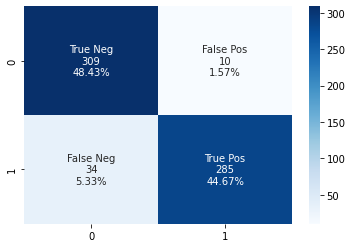

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cvcmsdt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cvcmsdt.flatten()/np.sum(cvcmsdt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cvcmsdt, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(dtclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.875      0.9375     0.875      0.9375     0.9375     0.9375
 0.921875   0.96875    0.92063492 1.        ]

Cross Val Accuracy : 0.9311259920634921


In [ ]:
cvresult(Y,Y_cvpreddt)

Cross Val f1 score :  0.9283387622149837
Cross Val Precision :  0.9661016949152542
Cross Val recall :  0.8934169278996865
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       319
           1       0.97      0.89      0.93       319

    accuracy                           0.93       638
   macro avg       0.93      0.93      0.93       638
weighted avg       0.93      0.93      0.93       638



In [ ]:
result(Y_test,Y_preddt)

Accuracy :  0.98125
f1 score :  0.9798657718120806
Precision :  1.0
recall :  0.9605263157894737
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        84
           1       1.00      0.96      0.98        76

    accuracy                           0.98       160
   macro avg       0.98      0.98      0.98       160
weighted avg       0.98      0.98      0.98       160



In [ ]:
dt_auc = roc_auc_score(Y_test,dt_prob[:,1])
print('roc-auc score :{}'.format(dt_auc))

roc-auc score :0.9898966165413534


## Random forest

In [ ]:
rfclassifier = RandomForestClassifier(n_estimators = best_paramrf['n_estimators'],bootstrap=best_paramrf['bootstrap'],
                                      max_depth=best_paramrf['max_depth'],
                                      max_features=best_paramrf['max_features'], random_state = 42)
rfclassifier.fit(X,Y)

RandomForestClassifier(max_depth=10, n_estimators=13, random_state=42)

In [ ]:
Y_predrf = rfclassifier.predict(X_test)

In [ ]:
ytest_pred = rfclassifier.predict_proba(X_test)
rf_prob = rfclassifier.predict_proba(X_test)

In [ ]:
Y_cvpredrf = cross_val_predict(rfclassifier,X,Y,cv = 10)

In [ ]:
cms = confusion_matrix(Y_test,Y_predrf)
print(cms)

[[84  0]
 [ 0 76]]


In [ ]:
cvcmsrf = confusion_matrix(Y, Y_cvpredrf)
print(cvcmsrf)

[[318   1]
 [  8 311]]


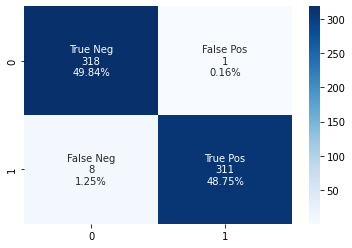

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cvcmsrf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cvcmsrf.flatten()/np.sum(cvcmsrf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cvcmsrf, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(rfclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.9375     1.         0.96875    1.         0.96875    1.
 1.         1.         0.98412698 1.        ]

Cross Val Accuracy : 0.9859126984126985


In [ ]:
cvresult(Y,Y_cvpredrf)

Cross Val f1 score :  0.9857369255150555
Cross Val Precision :  0.9967948717948718
Cross Val recall :  0.9749216300940439
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       319
           1       1.00      0.97      0.99       319

    accuracy                           0.99       638
   macro avg       0.99      0.99      0.99       638
weighted avg       0.99      0.99      0.99       638



In [ ]:
result(Y_test,Y_predrf)

Accuracy :  1.0
f1 score :  1.0
Precision :  1.0
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        76

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [ ]:
rf_auc = roc_auc_score(Y_test,rf_prob[:,1])
print('roc-auc score :{}'.format(rf_auc))

roc-auc score :1.0


## Extra Tree

In [ ]:
etclassifier = ExtraTreeClassifier(max_depth=best_paramet['max_depth'],
                                   max_features=best_paramet['max_features'],random_state=42)
etclassifier.fit(X,Y)

ExtraTreeClassifier(max_depth=5, max_features='log2', random_state=42)

In [ ]:
Y_predet = etclassifier.predict(X_test)

In [ ]:
ytest_pred = etclassifier.predict_proba(X_test)
et_prob = etclassifier.predict_proba(X_test)

In [ ]:
Y_cvpredet = cross_val_predict(etclassifier,X,Y,cv = 10)

In [ ]:
cms = confusion_matrix(Y_test,Y_predet)
print(cms)

[[82  2]
 [13 63]]


In [ ]:
cvcmset = confusion_matrix(Y, Y_cvpredet)
print(cvcmset)

[[308  11]
 [ 49 270]]


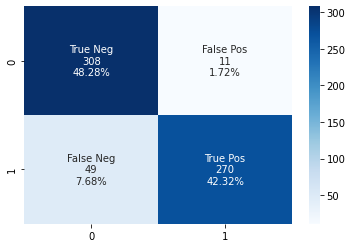

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cvcmset.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cvcmset.flatten()/np.sum(cvcmset)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cvcmset, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(etclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.890625   0.875      0.90625    0.9375     0.796875   0.90625
 0.9375     0.9375     0.93650794 0.93650794]

Cross Val Accuracy : 0.9060515873015873


In [ ]:
cvresult(Y,Y_cvpredet)

Cross Val f1 score :  0.9
Cross Val Precision :  0.9608540925266904
Cross Val recall :  0.8463949843260188
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       319
           1       0.96      0.85      0.90       319

    accuracy                           0.91       638
   macro avg       0.91      0.91      0.91       638
weighted avg       0.91      0.91      0.91       638



In [ ]:
result(Y_test,Y_predet)

Accuracy :  0.90625
f1 score :  0.8936170212765957
Precision :  0.9692307692307692
recall :  0.8289473684210527
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92        84
           1       0.97      0.83      0.89        76

    accuracy                           0.91       160
   macro avg       0.92      0.90      0.90       160
weighted avg       0.91      0.91      0.91       160



In [ ]:
et_auc = roc_auc_score(Y_test,et_prob[:,1])
print('roc-auc score :{}'.format(et_auc))

roc-auc score :0.9352286967418546


## ROC-AUC Curve

In [ ]:
pred = []
for model in [classifier, kclassifier, sclassifier, ksclassifier, nbclassifier, dtclassifier,rfclassifier] :
  pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print('Final roc-auc score :{}'.format(roc_auc_score(Y_test,final_prediction)))

Final roc-auc score :0.9992600813910469


In [ ]:
pd.concat(pred,axis=1)

,0,1,2,3,4,5,6
0,0.666244,1.0,0.828458,0.722626,0.993031,0.850467,0.914336
1,0.016146,0.0,0.006163,0.009853,0.000030,0.000000,0.000000
2,0.752140,0.6,0.828422,0.749601,0.996622,0.850467,0.995951
3,0.797049,1.0,0.828355,0.789770,0.996566,0.850467,0.993204
4,0.669810,1.0,0.843506,0.666235,0.993695,0.850467,0.923077
...,...,...,...,...,...,...,...
99,0.562780,0.8,0.828462,0.561091,0.993016,0.850467,0.870330
100,0.963229,0.8,0.846488,0.976840,0.995830,0.850467,1.000000
101,0.893336,1.0,0.991054,0.926248,0.997809,0.850467,1.000000
102,0.962934,0.8,0.947869,0.967447,0.974456,0.850467,0.912315


In [ ]:
final_prediction

0      0.853595
1      0.004599
2      0.824744
3      0.893630
4      0.849541
         ...   
99     0.780878
100    0.918979
101    0.951273
102    0.916498
103    0.785380
Length: 104, dtype: float64

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, final_prediction)
thresholds

array([1.97273895e+00, 9.72738952e-01, 6.56454457e-01, 6.44146298e-01,
       6.42774035e-01, 1.19646324e-03])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for thres in thresholds:
  y_pred = np.where(final_prediction>thres,1,0)
  accuracy_ls.append(accuracy_score(Y_test,y_pred, normalize=True))
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns = ['Thresholds','Accuracy']
accuracy_ls.sort_values(by='Accuracy', ascending = False, inplace=True)
accuracy_ls.head()

,Thresholds,Accuracy
2,0.656454,0.980769
3,0.644146,0.980769
4,0.642774,0.971154
0,1.972739,0.509615
1,0.972739,0.509615


In [ ]:
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color = 'red', label='ROC')
  plt.plot([0,1], [0,1], color= 'blue', linestyle='--' )
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC CURVE')
  plt.legend()
  plt.show()

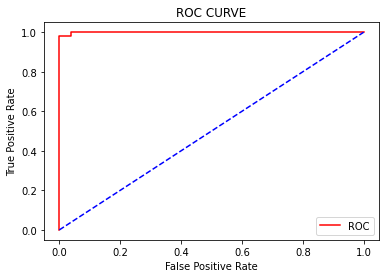

In [ ]:
plot_roc_curve(fpr, tpr)

In [ ]:
lr_fpr,lr_tpr,_ = roc_curve(Y_test,lr_prob[:,1])
svm_fpr,svm_tpr,_ = roc_curve(Y_test,svm_prob[:,1])
nb_fpr,nb_tpr,_ = roc_curve(Y_test,nb_prob[:,1])
dt_fpr,dt_tpr,_ = roc_curve(Y_test,dt_prob[:,1])
rf_fpr,rf_tpr,_ = roc_curve(Y_test,rf_prob[:,1])
et_fpr,et_tpr,_ = roc_curve(Y_test,et_prob[:,1])

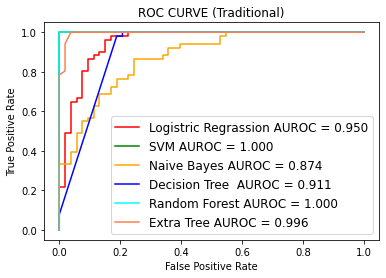

In [ ]:
plt.plot(lr_fpr, lr_tpr, color = 'red', linestyle='-',label='Logistric Regrassion AUROC = %0.3f'% lr_auc)
plt.plot(svm_fpr, svm_tpr, color = 'green', linestyle='-',label='SVM AUROC = %0.3f'% svm_auc)
plt.plot(nb_fpr, nb_tpr, color = 'orange', linestyle='-',label='Naive Bayes AUROC = %0.3f'% nb_auc)
plt.plot(dt_fpr, dt_tpr, color = 'blue', linestyle='-',label='Decision Tree  AUROC = %0.3f'% dt_auc)
plt.plot(rf_fpr, rf_tpr, color = 'cyan', linestyle='-',label='Random Forest AUROC = %0.3f'% rf_auc)
plt.plot(et_fpr, et_tpr, color = 'coral', linestyle='-',label='Extra Tree AUROC = %0.3f'% et_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE (Traditional)')
plt.legend(loc=4, prop={'size': 12})
plt.show()

# Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [('SVM', sclassifier),('RF', rfclassifier)]
stackclassifier = StackingClassifier(estimators=estimators)


cross validation
cross accuracy: 0.9890376984126984
cross precision: 0.9828282828282827
cross recall: 0.996875
cross f1 score: 0.9894534223945989


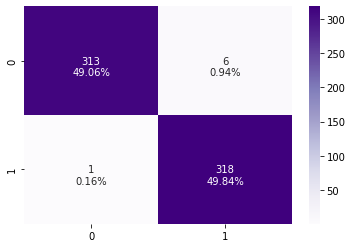

In [ ]:
Kfold_result(X,Y,stackclassifier,10)

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score, roc_curve
stackclassifier.fit(X,Y)
st_probs_y = stackclassifier.predict_proba(X)
st_auc_y = roc_auc_score(Y, st_probs_y[:,1])
st_fpr, st_tpr, threshold = roc_curve(Y,st_probs_y[:,1])
print(st_auc_y)

1.0


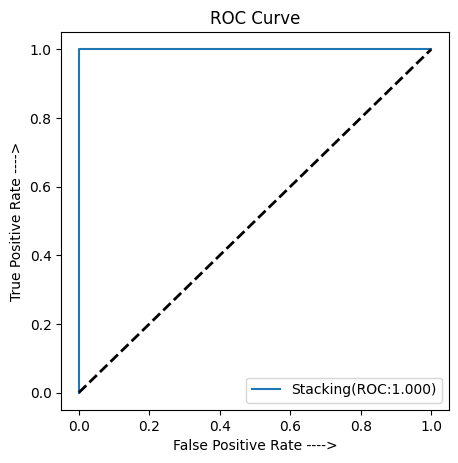

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

plt.figure(figsize=(5,5),dpi = 100)
plt.plot(st_fpr,st_tpr,linestyle='-',label='Stacking(ROC:%0.3f)' % st_auc_y)
lw=2
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate ---->")
plt.ylabel("True Positive Rate ---->")
plt.legend()
plt.show()

#Hard Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
eclfh = VotingClassifier(estimators=[('LRmodel', classifier), ('SVM', sclassifier), ('rf', rfclassifier)],voting='hard')

for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR Classifier', 'SVM', 'RF', 'Ensemble_hard']):
      scores = cross_val_score(clf, X, Y, scoring='accuracy', cv=10)
      print("Accuracy: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR Classifier', 'SVM', 'RF', 'Ensemble']):
      scores = cross_val_score(clf, X, Y, scoring='precision', cv=10)
      print("Precision: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR Classifier', 'SVM', 'RF', 'Ensemble']):
      scores = cross_val_score(clf, X, Y, scoring='recall', cv=10)
      print("Recall: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))



Accuracy: 0.9373 (+/- 0.036) [LR Classifier]
Accuracy: 0.9828 (+/- 0.018) [SVM]
Accuracy: 0.9859 (+/- 0.020) [RF]
Accuracy: 0.9812 (+/- 0.024) [Ensemble_hard]
Precision: 0.9483 (+/- 0.058) [LR Classifier]
Precision: 0.9828 (+/- 0.034) [SVM]
Precision: 0.9969 (+/- 0.009) [RF]
Precision: 0.9827 (+/- 0.034) [Ensemble]
Recall: 0.9313 (+/- 0.059) [LR Classifier]
Recall: 0.9843 (+/- 0.021) [SVM]
Recall: 0.9750 (+/- 0.039) [RF]
Recall: 0.9812 (+/- 0.037) [Ensemble]


# Soft ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
eclfs = VotingClassifier(estimators=[('LR', classifier), ('SVM', sclassifier), ('RF', rfclassifier)],voting='soft')

for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR', 'SVM', 'RF', 'Ensemble_soft']):
      scores = cross_val_score(clf, X, Y, scoring='accuracy', cv=10)
      print("Accuracy: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR', 'SVM', 'RF', 'Ensemble_soft']):
      scores = cross_val_score(clf, X, Y, scoring='precision', cv=10)
      print("Precision: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR', 'SVM', 'RF', 'Ensemble_soft']):
      scores = cross_val_score(clf, X, Y, scoring='recall', cv=10)
      print("Recall: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.9373 (+/- 0.036) [LR]
Accuracy: 0.9828 (+/- 0.018) [SVM]
Accuracy: 0.9859 (+/- 0.020) [RF]
Accuracy: 0.9812 (+/- 0.024) [Ensemble_soft]
Precision: 0.9483 (+/- 0.058) [LR]
Precision: 0.9828 (+/- 0.034) [SVM]
Precision: 0.9969 (+/- 0.009) [RF]
Precision: 0.9827 (+/- 0.034) [Ensemble_soft]
Recall: 0.9313 (+/- 0.059) [LR]
Recall: 0.9843 (+/- 0.021) [SVM]
Recall: 0.9750 (+/- 0.039) [RF]
Recall: 0.9812 (+/- 0.037) [Ensemble_soft]


In [ ]:
def Kfold_result(X,Y,model,foldnum):
   print("\ncross validation")
   from sklearn.model_selection import cross_val_score, cross_validate,cross_val_predict
   from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
   scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}

   results = cross_validate(estimator=model,
                                          X=X,
                                          y=Y,
                                          cv=10,
                                          scoring=scoring)
   print('cross accuracy:',np.mean(results['test_accuracy']))
   print('cross precision:',np.mean(results['test_precision']))
   print('cross recall:',np.mean(results['test_recall']))
   print('cross f1 score:', np.mean(results['test_f1_score']))
   cross_pred_test = cross_val_predict(model,X,Y,cv = 10)
   cm = confusion_matrix(Y,cross_pred_test)
   group_names = ['','','','']
   group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
   group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
   labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
   labels = np.asarray(labels).reshape(2,2)
   sns.heatmap(cm, annot=labels, fmt='', cmap='Purples')

   pass


cross validation
cross accuracy: 0.9812251984126984
cross precision: 0.9828282828282827
cross recall: 0.98125
cross f1 score: 0.9811994541406307


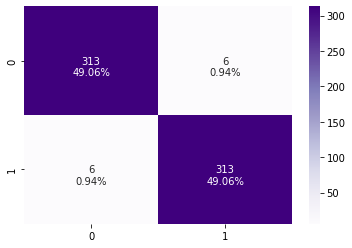

In [ ]:
Kfold_result(X,Y,eclfs,10)

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score, roc_curve
eclfs.fit(X,Y)
es_probs_y = eclfs.predict_proba(X)
es_auc_y = roc_auc_score(Y, es_probs_y[:,1])
es_fpr, es_tpr, threshold = roc_curve(Y,es_probs_y[:,1])
print(es_auc_y)

1.0


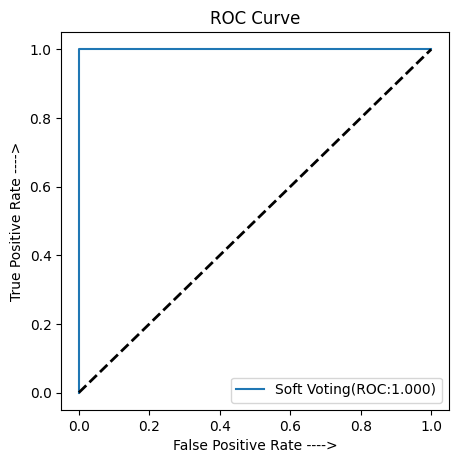

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve


plt.figure(figsize=(5,5),dpi = 100)
plt.plot(es_fpr,es_tpr,linestyle='-',label='Soft Voting(ROC:%0.3f)' % es_auc_y)
lw=2
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate ---->")
plt.ylabel("True Positive Rate ---->")
plt.legend()
plt.show()

# ROC

In [ ]:
lr_fpr,lr_tpr,_ = roc_curve(Y_test,lr_prob[:,1])
svm_fpr,svm_tpr,_ = roc_curve(Y_test,svm_prob[:,1])
nb_fpr,nb_tpr,_ = roc_curve(Y_test,nb_prob[:,1])
dt_fpr,dt_tpr,_ = roc_curve(Y_test,dt_prob[:,1])
rf_fpr,rf_tpr,_ = roc_curve(Y_test,rf_prob[:,1])
et_fpr,et_tpr,_ = roc_curve(Y_test,et_prob[:,1])


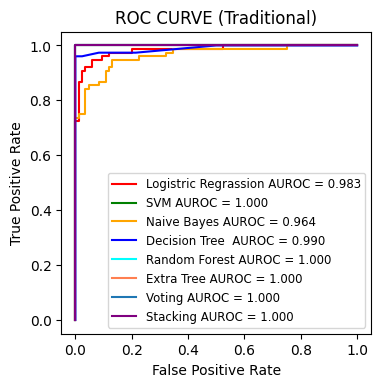

In [ ]:
plt.figure(figsize=(4,4),dpi = 100)
plt.plot(lr_fpr, lr_tpr, color = 'red', linestyle='-',label='Logistric Regrassion AUROC = %0.3f'% lr_auc)
plt.plot(svm_fpr, svm_tpr, color = 'green', linestyle='-',label='SVM AUROC = %0.3f'% svm_auc)
plt.plot(nb_fpr, nb_tpr, color = 'orange', linestyle='-',label='Naive Bayes AUROC = %0.3f'% nb_auc)
plt.plot(dt_fpr, dt_tpr, color = 'blue', linestyle='-',label='Decision Tree  AUROC = %0.3f'% dt_auc)
plt.plot(rf_fpr, rf_tpr, color = 'cyan', linestyle='-',label='Random Forest AUROC = %0.3f'% rf_auc)
plt.plot(et_fpr, et_tpr, color = 'coral', linestyle='-',label='Extra Tree AUROC = %0.3f'% et_auc)
plt.plot(es_fpr,es_tpr,linestyle='-',label='Voting AUROC = %0.3f' % es_auc_y)
plt.plot(st_fpr,st_tpr,color = 'purple', linestyle='-',label='Stacking AUROC = %0.3f' % st_auc_y)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE (Traditional)')
plt.legend(loc=4, prop={'size': 8.5})
plt.show()

# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

## Hyper parameter Tuning

### Bagging Logistic Regression Random Search

In [ ]:
grs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [LogisticRegression(solver='liblinear',multi_class='auto')],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
grs.fit(X,Y)
best_paramgrs = grs.best_params_
pd.DataFrame(grs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]

,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,False,28,4,0.821599
1,None,13,3,0.802175
2,None,14,1,0.816632
3,False,34,1,0.804702
4,False,84,5,0.814370
5,None,51,1,0.814223
6,None,90,3,0.816632
7,None,18,3,0.814223
8,False,47,4,0.816779
9,True,62,2,0.819160


### Bagging KNN Random Search

In [ ]:
kgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [KNeighborsClassifier()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
kgrs.fit(X_train,Y_train)
pd.DataFrame(kgrs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]


,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,True,52,4,0.809677
1,True,35,2,0.819355
2,True,70,1,0.809677
3,None,64,4,0.800000
4,False,6,3,0.803226
5,False,2,2,0.754839
6,False,54,4,0.806452
7,False,8,1,0.838710
8,None,10,3,0.809677
9,None,64,3,0.803226


### Bagging SVM Random Search

In [ ]:
sgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [SVC()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
sgrs.fit(X,Y)
best_paramsgrs = sgrs.best_params_
pd.DataFrame(grs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]
print(best_paramsgrs)

{'n_jobs': 5, 'n_estimators': 56, 'bootstrap_features': None, 'base_estimator': SVC()}


### Bagging Naive Bayes Random Search

In [ ]:
nbgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [GaussianNB()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
nbgrs.fit(X,Y)
best_paramnbgrs = nbgrs.best_params_
pd.DataFrame(nbgrs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]

,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,False,99,2,0.826418
1,False,53,3,0.816779
2,True,71,1,0.824008
3,True,56,4,0.826418
4,None,95,5,0.824008
5,None,49,4,0.821599
6,True,17,4,0.811960
7,False,86,2,0.824008
8,None,35,2,0.824008
9,True,39,3,0.819189


### Bagging Decision Tree Random Search

In [ ]:
dtgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [DecisionTreeClassifier()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
dtgrs.fit(X,Y)
best_paramdtgrs = dtgrs.best_params_
pd.DataFrame(dtgrs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]

,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,None,81,1,0.855304
1,None,27,4,0.848105
2,None,33,2,0.852924
3,False,29,1,0.874640
4,True,92,3,0.874669
5,True,2,3,0.753776
6,True,63,3,0.874640
7,None,17,2,0.843285
8,None,15,2,0.838495
9,None,24,3,0.848134


### Bagging Random Forest Random Search

In [ ]:
rfgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [RandomForestClassifier()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
rfgrs.fit(X,Y)
best_paramrfgrs = rfgrs.best_params_
pd.DataFrame(rfgrs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]

,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,True,26,4,0.850573
1,True,58,2,0.857773
2,True,50,1,0.848134
3,False,76,4,0.865001
4,False,89,3,0.852983
5,False,62,5,0.865031
6,True,40,3,0.852953
7,None,55,1,0.857773
8,True,21,3,0.862621
9,None,80,3,0.855363


### Bagging Extra Tree Random Search

In [ ]:
etgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [ExtraTreeClassifier()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
etgrs.fit(X,Y)
best_parametgrs = etgrs.best_params_
pd.DataFrame(etgrs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]

,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,None,67,5,0.964117
1,False,53,4,0.947603
2,True,5,4,0.955784
3,None,76,1,0.953082
4,False,31,5,0.947527
5,True,86,3,0.947527
6,False,48,5,0.955860
7,None,74,3,0.953082
8,None,77,4,0.955822
9,None,48,3,0.947565


## Base estimator Logistric Regression

In [ ]:
bag = BaggingClassifier(classifier,n_estimators= best_paramgrs['n_estimators'],bootstrap_features=best_paramgrs['bootstrap_features'],
                        n_jobs=best_paramgrs['n_jobs'],random_state=42)

In [ ]:
bag.fit(X,Y)

BaggingClassifier(base_estimator=LogisticRegression(C=1, random_state=42),
                  bootstrap_features='False', n_estimators=28, n_jobs=4,
                  random_state=42)

In [ ]:
Y_predbglr = bag.predict(X_test)

In [ ]:
Y_cvpredbglr = cross_val_predict(bag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbglr)
print(cm)

[[41 12]
 [ 1 50]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbglr)
print(cmbg)

[[149  58]
 [  8 199]]


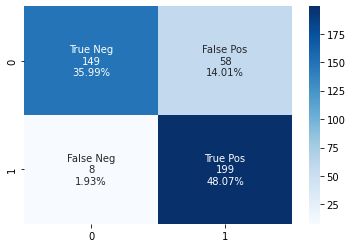

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(bag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.52380952 0.52380952 0.61904762 0.92857143 0.97560976 1.
 0.92682927 1.         0.95121951 0.97560976]

Cross Val Accuracy : 0.842450638792102


In [ ]:
cvresult(Y,Y_cvpredbglr)

Cross Val f1 score :  0.8577586206896551
Cross Val Precision :  0.77431906614786
Cross Val recall :  0.961352657004831
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.72      0.82       207
           1       0.77      0.96      0.86       207

    accuracy                           0.84       414
   macro avg       0.86      0.84      0.84       414
weighted avg       0.86      0.84      0.84       414



In [ ]:
result(Y_test,Y_predbglr)

Accuracy :  0.875
f1 score :  0.8849557522123893
Precision :  0.8064516129032258
recall :  0.9803921568627451
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.77      0.86        53
           1       0.81      0.98      0.88        51

    accuracy                           0.88       104
   macro avg       0.89      0.88      0.87       104
weighted avg       0.89      0.88      0.87       104



In [ ]:
lrbg_prob = bag.predict_proba(X_test)
lrbg_auc = roc_auc_score(Y_test,lrbg_prob[:,1])
print('roc-auc score :{}'.format(lrbg_auc))

roc-auc score :0.9404365519792823


## Base estimator K-NN

In [ ]:
kbag = BaggingClassifier(kclassifier, n_estimators= 75,bootstrap_features=False,n_jobs=3)

In [ ]:
kbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=1,
                                                      metric='euclidean',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=1,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=75, n_jobs=3, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

In [ ]:
Y_predbgk = kbag.predict(X_test)

In [ ]:
Y_cvpredbgk = cross_val_predict(kbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgk)
print(cm)

[[36  1]
 [ 1 53]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgk)
print(cmbg)

[[171  10]
 [  3 178]]


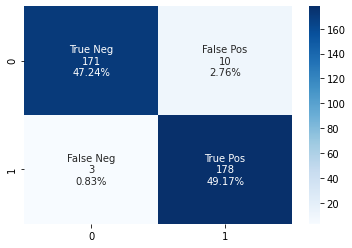

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(kbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 0.97222222
 0.88888889 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9641891891891892


In [ ]:
cvresult(Y,Y_cvpredbgk)

Cross Val f1 score :  0.964769647696477
Cross Val Precision :  0.9468085106382979
Cross Val recall :  0.9834254143646409
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       181
           1       0.95      0.98      0.96       181

    accuracy                           0.96       362
   macro avg       0.96      0.96      0.96       362
weighted avg       0.96      0.96      0.96       362



In [ ]:
result(Y_test,Y_predbgk)

Accuracy :  0.978021978021978
f1 score :  0.9814814814814815
Precision :  0.9814814814814815
recall :  0.9814814814814815
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.98      0.98      0.98        54

    accuracy                           0.98        91
   macro avg       0.98      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



In [ ]:
knnbg_prob = kbag.predict_proba(X_test)
knnbg_auc = roc_auc_score(Y_test,knnbg_prob[:,1])
print('roc-auc score :{}'.format(knnbg_auc))

roc-auc score :0.9994994994994995


## Base estimator SVM

In [ ]:
sbag = BaggingClassifier(sclassifier, n_estimators= best_paramsgrs['n_estimators'],bootstrap_features=best_paramsgrs['bootstrap_features'],
                          n_jobs= best_paramsgrs['n_jobs'],random_state=42)

In [ ]:
sbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=SVC(C=50, probability=True, random_state=42),
                  bootstrap_features=None, n_estimators=56, n_jobs=5,
                  random_state=42)

In [ ]:
Y_predbgs = sbag.predict(X_test)

In [ ]:
Y_cvpredbgs = cross_val_predict(sbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgs)
print(cm)

[[43 10]
 [ 7 44]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgs)
print(cmbg)

[[172  35]
 [ 11 196]]


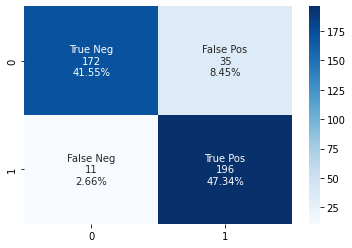

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(sbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.71428571 0.71428571 0.83333333 0.9047619  0.80487805 0.97560976
 0.97560976 0.97560976 1.         1.        ]

Cross Val Accuracy : 0.8898373983739838


In [ ]:
cvresult(Y,Y_cvpredbgs)

Cross Val f1 score :  0.8949771689497718
Cross Val Precision :  0.8484848484848485
Cross Val recall :  0.9468599033816425
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.83      0.88       207
           1       0.85      0.95      0.89       207

    accuracy                           0.89       414
   macro avg       0.89      0.89      0.89       414
weighted avg       0.89      0.89      0.89       414



In [ ]:
result(Y_test,Y_predbgs)

Accuracy :  0.8365384615384616
f1 score :  0.838095238095238
Precision :  0.8148148148148148
recall :  0.8627450980392157
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.81      0.83        53
           1       0.81      0.86      0.84        51

    accuracy                           0.84       104
   macro avg       0.84      0.84      0.84       104
weighted avg       0.84      0.84      0.84       104



In [ ]:
svmbg_prob = sbag.predict_proba(X_test)
svmbg_auc = roc_auc_score(Y_test,svmbg_prob[:,1])
print('roc-auc score :{}'.format(svmbg_auc))

roc-auc score :0.9208287088420275


## Base estimator kernal SVM

In [ ]:
ksbag = BaggingClassifier(ksclassifier, n_estimators= 75,bootstrap_features=True,n_jobs=3)

In [ ]:
ksbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=SVC(C=1, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='linear',
                                     max_iter=-1, probability=True,
                                     random_state=0, shrinking=True, tol=0.001,
                                     verbose=False),
                  bootstrap=True, bootstrap_features=True, max_features=1.0,
                  max_samples=1.0, n_estimators=75, n_jobs=3, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

In [ ]:
Y_predbgks = ksbag.predict(X_test)

In [ ]:
Y_cvpredbgks = cross_val_predict(ksbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgks)
print(cm)

[[37  0]
 [ 0 54]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgks)
print(cmbg)

[[171  10]
 [  2 179]]


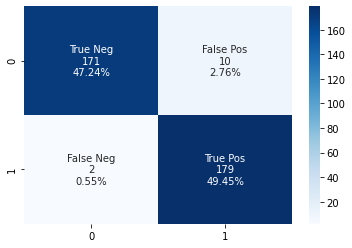

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(ksbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 1.
 0.88888889 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9669669669669669


In [ ]:
cvresult(Y,Y_cvpredbgks)

Cross Val f1 score :  0.9675675675675676
Cross Val Precision :  0.9470899470899471
Cross Val recall :  0.988950276243094
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       181
           1       0.95      0.99      0.97       181

    accuracy                           0.97       362
   macro avg       0.97      0.97      0.97       362
weighted avg       0.97      0.97      0.97       362



In [ ]:
result(Y_test,Y_predks)

Accuracy :  1.0
f1 score :  1.0
Precision :  1.0
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        54

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



In [ ]:
ksvmbg_prob = ksbag.predict_proba(X_test)
ksvmbg_auc = roc_auc_score(Y_test,ksvmbg_prob[:,1])
print('roc-auc score :{}'.format(ksvmbg_auc))

roc-auc score :1.0


## Base estimator Naive Bayes

In [ ]:
nbbag = BaggingClassifier(nbclassifier, n_estimators= best_paramnbgrs['n_estimators'],
                          bootstrap_features=best_paramnbgrs['bootstrap_features'],
                          n_jobs=best_paramnbgrs['n_jobs'],random_state=42)

In [ ]:
nbbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=0.01),
                  bootstrap=True, bootstrap_features='True', max_features=1.0,
                  max_samples=1.0, n_estimators=72, n_jobs=4, oob_score=False,
                  random_state=42, verbose=0, warm_start=False)

In [ ]:
Y_predbgnb = nbbag.predict(X_test)

In [ ]:
Y_cvpredbgnb = cross_val_predict(nbbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgnb)
print(cm)

[[37  0]
 [ 1 53]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgnb)
print(cmbg)

[[173   8]
 [  4 177]]


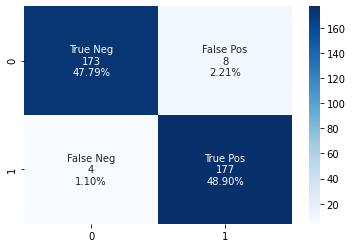

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(nbbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 1.
 0.94444444 0.97222222 0.94444444 0.97222222]

Cross Val Accuracy : 0.9669669669669669


In [ ]:
cvresult(Y,Y_cvpredbgnb)

Cross Val f1 score :  0.9672131147540983
Cross Val Precision :  0.9567567567567568
Cross Val recall :  0.9779005524861878
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       181
           1       0.96      0.98      0.97       181

    accuracy                           0.97       362
   macro avg       0.97      0.97      0.97       362
weighted avg       0.97      0.97      0.97       362



In [ ]:
result(Y_test,Y_predbgnb)

Accuracy :  0.989010989010989
f1 score :  0.9906542056074767
Precision :  1.0
recall :  0.9814814814814815
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.98      0.99        54

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



In [ ]:
nbbg_prob = nbbag.predict_proba(X_test)
nbbg_auc = roc_auc_score(Y_test,nbbg_prob[:,1])
print('roc-auc score :{}'.format(nbbg_auc))

roc-auc score :1.0


## Base estimator Decision Tree

In [ ]:
dtbag = BaggingClassifier(dtclassifier, n_estimators= best_paramdtgrs['n_estimators'],bootstrap_features=best_paramdtgrs['bootstrap_features'],
                          n_jobs=best_paramdtgrs['n_jobs'],random_state =42)

In [ ]:
dtbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=1,
                                                        max_features=None,
                                                        max_leaf_nodes=70,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=4,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
       

In [ ]:
Y_predbgdt = dtbag.predict(X_test)

In [ ]:
Y_cvpredbgdt = cross_val_predict(dtbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgdt)
print(cm)

[[37  0]
 [ 2 52]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgdt)
print(cmbg)

[[171  10]
 [  2 179]]


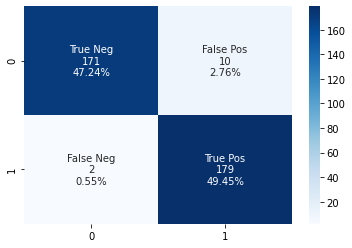

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(dtbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 1.
 0.88888889 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9669669669669669


In [ ]:
cvresult(Y,Y_cvpredbgdt)

Cross Val f1 score :  0.9675675675675676
Cross Val Precision :  0.9470899470899471
Cross Val recall :  0.988950276243094
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       181
           1       0.95      0.99      0.97       181

    accuracy                           0.97       362
   macro avg       0.97      0.97      0.97       362
weighted avg       0.97      0.97      0.97       362



In [ ]:
result(Y_test,Y_predbgdt)

Accuracy :  0.978021978021978
f1 score :  0.9811320754716981
Precision :  1.0
recall :  0.9629629629629629
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.96      0.98        54

    accuracy                           0.98        91
   macro avg       0.97      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



In [ ]:
dtbg_prob = dtbag.predict_proba(X_test)
dtbg_auc = roc_auc_score(Y_test,dtbg_prob[:,1])
print('roc-auc score :{}'.format(dtbg_auc))

roc-auc score :1.0


## Base estimator Random Forest

In [ ]:
rfbag = BaggingClassifier(rfclassifier, n_estimators= best_paramrfgrs['n_estimators'],bootstrap_features=best_paramrfgrs['bootstrap_features'],
                          n_jobs=best_paramrfgrs['n_jobs'],random_state=42)

In [ ]:
rfbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features='log2',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
        

In [ ]:
Y_predbgrf = rfbag.predict(X_test)

In [ ]:
Y_cvpredbgrf = cross_val_predict(rfbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgrf)
print(cm)

[[37  0]
 [ 1 53]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgrf)
print(cmbg)

[[172   9]
 [  4 177]]


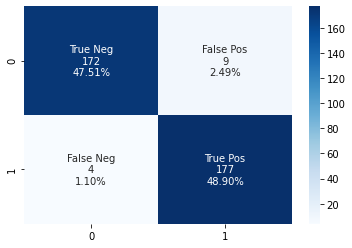

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(rfbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 0.97222222
 0.88888889 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9641891891891892


In [ ]:
cvresult(Y,Y_cvpredbgrf)

Cross Val f1 score :  0.9645776566757494
Cross Val Precision :  0.9516129032258065
Cross Val recall :  0.9779005524861878
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       181
           1       0.95      0.98      0.96       181

    accuracy                           0.96       362
   macro avg       0.96      0.96      0.96       362
weighted avg       0.96      0.96      0.96       362



In [ ]:
result(Y_test,Y_predbgrf)

Accuracy :  0.989010989010989
f1 score :  0.9906542056074767
Precision :  1.0
recall :  0.9814814814814815
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.98      0.99        54

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



In [ ]:
rfbg_prob = rfbag.predict_proba(X_test)
rfbg_auc = roc_auc_score(Y_test,rfbg_prob[:,1])
print('roc-auc score :{}'.format(rfbg_auc))

roc-auc score :0.9994994994994995


## Base estimator Extra Tree

In [ ]:
etbag = BaggingClassifier(etclassifier, n_estimators= best_parametgrs['n_estimators'],
                          bootstrap_features=best_parametgrs['bootstrap_features'],n_jobs=best_parametgrs['n_jobs'],random_state=42)

In [ ]:
etbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=ExtraTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=19,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     random_state=42,
                                                     splitter='random'),
                  bootstrap=True, bootstrap

In [ ]:
Y_predbget = etbag.predict(X_test)

In [ ]:
Y_cvpredbget = cross_val_predict(etbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbget)
print(cm)

[[37  0]
 [ 2 52]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbget)
print(cmbg)

[[173   8]
 [  8 173]]


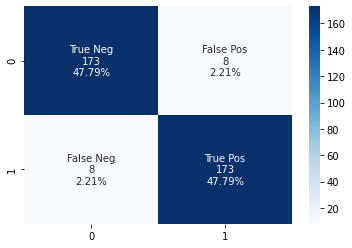

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(etbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.86486486 1.         1.         0.97222222 0.91666667 0.94444444
 0.88888889 1.         0.97222222 1.        ]

Cross Val Accuracy : 0.955930930930931


In [ ]:
cvresult(Y,Y_cvpredbget)

Cross Val f1 score :  0.9558011049723757
Cross Val Precision :  0.9558011049723757
Cross Val recall :  0.9558011049723757
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       181
           1       0.96      0.96      0.96       181

    accuracy                           0.96       362
   macro avg       0.96      0.96      0.96       362
weighted avg       0.96      0.96      0.96       362



In [ ]:
result(Y_test,Y_predbget)

Accuracy :  0.978021978021978
f1 score :  0.9811320754716981
Precision :  1.0
recall :  0.9629629629629629
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.96      0.98        54

    accuracy                           0.98        91
   macro avg       0.97      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



In [ ]:
etbg_prob = etbag.predict_proba(X_test)
etbg_auc = roc_auc_score(Y_test,etbg_prob[:,1])
print('roc-auc score :{}'.format(etbg_auc))

roc-auc score :0.9997497497497497


## ROC AUC CURVE  (Bagging)

In [ ]:
lrg_fpr,lrg_tpr,_ = roc_curve(Y_test,lrbg_prob[:,1])
svmg_fpr,svmg_tpr,_ = roc_curve(Y_test,svmbg_prob[:,1])
nbg_fpr,nbg_tpr,_ = roc_curve(Y_test,nbbg_prob[:,1])
dtg_fpr,dtg_tpr,_ = roc_curve(Y_test,dtbg_prob[:,1])
rfg_fpr,rfg_tpr,_ = roc_curve(Y_test,rfbg_prob[:,1])
etg_fpr,etg_tpr,_ = roc_curve(Y_test,etbg_prob[:,1])

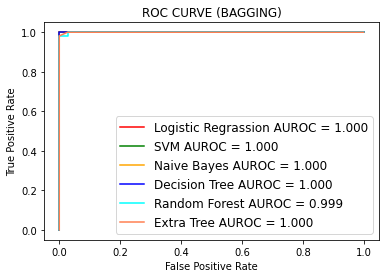

In [ ]:
plt.plot(lrg_fpr, lrg_tpr, color = 'red', linestyle='-',label='Logistic Regrassion AUROC = %0.3f'% lrbg_auc)
plt.plot(svmg_fpr, svmg_tpr, color = 'green', linestyle='-',label='SVM AUROC = %0.3f'% svmbg_auc)
plt.plot(nbg_fpr, nbg_tpr, color = 'orange', linestyle='-',label='Naive Bayes AUROC = %0.3f'% nbbg_auc)
plt.plot(dtg_fpr, dtg_tpr, color = 'blue', linestyle='-',label='Decision Tree AUROC = %0.3f'% dtbg_auc)
plt.plot(rfg_fpr, rfg_tpr, color = 'cyan', linestyle='-',label='Random Forest AUROC = %0.3f'% rfbg_auc)
plt.plot(etg_fpr, etg_tpr, color = 'Coral', linestyle='-',label='Extra Tree AUROC = %0.3f'% etbg_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE (BAGGING)')
plt.legend(loc=4, prop={'size': 12})
plt.show()